Submission Proyek Akhir : Klasifikasi Gambar

Belajar Machine Learning Untuk Pemula Dicoding Indonesia

oleh:

Ryandito Diandaru

Surabaya, Jawa Timur

In [2]:
# pip install split-folders

In [3]:
#imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import splitfolders
import tensorflow as tf
import zipfile, os

from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# # UNCOMMENT ON RESTART
# # loading datasets
# !wget --no-check-certificate \
# https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \ -O /tmp/rockpaperscissors.zip

--2021-05-23 15:13:19--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  1004KB/s    in 6m 49s  

2021-05-23 15:20:09 (770 KB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]

--2021-05-23 15:20:09--  http://%20-o/
Resolving  -o ( -o)... failed: Name or service not known.
wget: unable to resolve host address ‘ -o’
/tmp/rockpaperscissors.zip: Scheme missing.
FINISHED --2021-05-23 15:20:09--
Total wall clock time: 6m 50s
Downloaded: 1 files, 308M in 6m 49s (770 KB/s)


In [5]:
#extracting to tmp folder
zip_ref = zipfile.ZipFile('rockpaperscissors.zip', 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [6]:
#making test and train directories
#defining source directories
baseDir = '/tmp/rockpaperscissors'
rpscvDir = '/tmp/rockpaperscissors/rps-cv-images'

# #UNCOMMENT ON RESTART
# #splitting jadi rasio 6:4
# splitfolders.ratio(rpscvDir, output = baseDir, seed = 1337, ratio=(0.6, 0.4))

#defining train-val directory
trainRpc = os.path.join(baseDir, 'train')
testRpc = os.path.join(baseDir, 'val')

#defining train-val directories for each {rock, paper, scissors}
#train
rock_train = os.path.join(trainRpc, 'rock')
paper_train = os.path.join(trainRpc, 'paper')
scissors_train = os.path.join(trainRpc, 'scissors')

#test
rock_test = os.path.join(testRpc, 'rock')
paper_test = os.path.join(testRpc, 'paper')
scissors_test = os.path.join(testRpc, 'scissors')

Copying files: 2188 files [00:00, 2906.10 files/s]


In [50]:
#augmentasi gambar dengan menggunakan image data generator
#for training
imgGen = ImageDataGenerator(
              rescale=1./255,
              rotation_range=20,
              horizontal_flip=True,
              shear_range=0.2,
              zoom_range=0.2,
              fill_mode = 'nearest')

#for validation, tidak terlalu banyak augmentasi untuk validation
valImgGen = ImageDataGenerator(rescale=1./255)

In [51]:
#train generator
trainGen = imgGen.flow_from_directory(
        trainRpc,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')
 
 #test generator
testGen = valImgGen.flow_from_directory(
        testRpc,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [52]:
#sequential machine learning model
model = tf.keras.models.Sequential()

#adding layers via add
#digunakan padding untuk setiap layer convolutional
model.add(layers.Conv2D(32, 3, activation='relu', padding='valid', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, 3, activation='relu', padding='valid'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, 3, activation='relu', padding='valid'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(256, 3, activation='relu', padding='valid'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax')) # 3 ouputs and softmax activation function for multiclass classification


#ngecompile gan
model.compile(loss='categorical_crossentropy', #karena ada 3 kateogri untuk diklasifikasi
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])


In [58]:
#fitting
history  = model.fit(
            trainGen,
            steps_per_epoch=60,
            epochs=20,
            validation_data=testGen,
            validation_steps=5,
            verbose=2)

Epoch 1/20
60/60 - 18s - loss: 0.1482 - accuracy: 0.9625 - val_loss: 0.0570 - val_accuracy: 1.0000
Epoch 2/20
60/60 - 17s - loss: 0.1634 - accuracy: 0.9292 - val_loss: 0.5448 - val_accuracy: 0.9500
Epoch 3/20
60/60 - 17s - loss: 0.1470 - accuracy: 0.9500 - val_loss: 0.6587 - val_accuracy: 0.9000
Epoch 4/20
60/60 - 17s - loss: 0.2859 - accuracy: 0.8958 - val_loss: 0.4461 - val_accuracy: 0.9500
Epoch 5/20
60/60 - 17s - loss: 0.1305 - accuracy: 0.9417 - val_loss: 0.1379 - val_accuracy: 0.9500
Epoch 6/20
60/60 - 17s - loss: 0.0856 - accuracy: 0.9667 - val_loss: 0.5279 - val_accuracy: 0.9500
Epoch 7/20
60/60 - 17s - loss: 0.1230 - accuracy: 0.9667 - val_loss: 0.0450 - val_accuracy: 1.0000
Epoch 8/20
60/60 - 17s - loss: 0.1458 - accuracy: 0.9500 - val_loss: 0.0995 - val_accuracy: 0.9000
Epoch 9/20
60/60 - 18s - loss: 0.1659 - accuracy: 0.9583 - val_loss: 0.0186 - val_accuracy: 1.0000
Epoch 10/20
60/60 - 17s - loss: 0.1600 - accuracy: 0.9500 - val_loss: 0.0318 - val_accuracy: 1.0000
Epoch 11/

In [62]:
#predicting from input
#nama files
tryPaper = os.path.join(baseDir, 'gpaper.png')
tryRock = os.path.join(baseDir, 'batu.jpeg')
tryScissors = os.path.join(baseDir, 'gunting.jpeg')

#loading as image
imgPaper = image.load_img(tryPaper, target_size=(150,150))
imgRock = image.load_img(tryRock, target_size=(150,150))
imgScissors = image.load_img(tryScissors, target_size=(150,150))

In [13]:
#biar tau index apa kelas apa
print(trainGen.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}


Paper


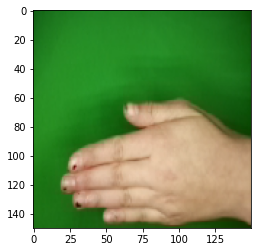

In [63]:
#predicting paper
#ambil contoh dari dataset
imgplot = plt.imshow(imgPaper)
x = image.img_to_array(imgPaper)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

if classes[0][0] == 1:
  print('Paper')
elif classes[0][1] == 1:
  print('Rock')
elif classes[0][2] == 1:
  print('Scissors')

# output_class = np.argmax(classes)
# if output_class==0:
#     print('paper')
# elif output_class==1:
#     print('rock')
# else:
#     print('scissors')

Rock


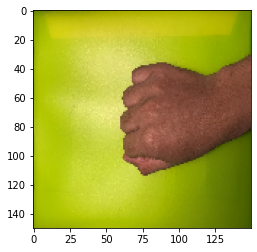

In [60]:
#predicting rock
#foto sendiri
imgplot = plt.imshow(imgRock)
x = image.img_to_array(imgRock)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

if classes[0][0] == 1:
  print('Paper')
elif classes[0][1] == 1:
  print('Rock')
elif classes[0][2] == 1:
  print('Scissors')

# output_class = np.argmax(classes)
# if output_class==0:
#     print('paper')
# elif output_class==1:
#     print('rock')
# else:
#     print('scissors')